# Small ipython notebook demonstrating noisiness of trees

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn import datasets
from sklearn import tree

%matplotlib inline

In [13]:
iris = datasets.load_iris()

feat1_idx = 0
feat2_idx = 1

X_train = iris.data[:,[feat1_idx,feat2_idx]]
y_train = iris.target

In [14]:
model = tree.DecisionTreeClassifier()
model.fit(X_train,y_train) 
model.score(X_train,y_train)

0.92666666666666664

In [15]:
x_min, x_max = X_train[:,0].min() - 0.5, X_train[:,0].max() + 0.5
y_min, y_max = X_train[:,1].min() - 0.5, X_train[:,1].max() + 0.5

In [16]:
step_size = .01
xx, yy = np.meshgrid(np.arange(x_min,x_max,step_size), np.arange(y_min,y_max,step_size))

In [17]:
zz = model.predict( np.c_[xx.ravel(),yy.ravel()]) 
zz = zz.reshape(xx.shape)

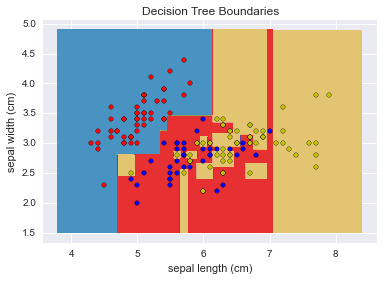

In [18]:
cs = plt.contourf(xx, yy, zz, cmap=plt.cm.Paired)
plt.xlabel(iris.feature_names[feat1_idx])
plt.ylabel(iris.feature_names[feat2_idx])
plt.title("Decision Tree Boundaries")

for i, color in zip(range(3), "rby"):
    idx = np.where(y_train == i)
    plt.scatter(X_train[idx, 0], X_train[idx, 1], c=color, label=iris.target_names[i],cmap=plt.cm.Paired)

Let's see how much the tree changes when we use features 0 and features 1 to predict classes.